In [60]:
#import dependencies
import pandas as pd 
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
src_file = Path.cwd() / '2.13. Practical example. Descriptive statistics_lesson.xlsx'

In [45]:
#read in data from excel file
sales_df = pd.read_excel(src_file, sheet_name = '365RE', usecols = 'A:AA')

In [46]:
#add column headers
sales_df.columns = sales_df.iloc[3]

In [47]:
#drop top excel styling rows
sales_df = sales_df.iloc[4:]

In [48]:
#view data
sales_df.head()

3,NaN,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
4,NaN,1030,1,2005,11,Apartment,30,743.086,246173,Sold,...,1986,6,21,F,USA,California,Home,5,No,Website
5,NaN,1029,1,2005,10,Apartment,29,756.213,246332,Sold,...,1983,2,24,F,USA,California,Home,5,No,Website
6,NaN,2002,2,2007,7,Apartment,2,587.281,209281,Sold,...,1985,12,27,M,USA,California,Home,1,Yes,Client
7,NaN,2031,2,2007,12,Apartment,31,1604.75,452667,Sold,...,1985,12,27,M,USA,California,Investment,3,Yes,Website
8,NaN,1049,1,2004,11,Apartment,49,1375.45,467083,Sold,...,1979,5,15,F,USA,California,Home,4,No,Agency


In [53]:
#frequency distribution by gender
sales_df.groupby('Gender')['Gender'].count()

Gender
F     70
M    108
Name: Gender, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

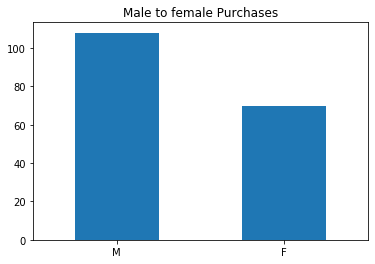

In [76]:
#visualize bar chart
sales_df['Gender'].value_counts().plot(kind='bar',title='Male to female Purchases')
plt.xticks(rotation=360)

In [77]:
#frequency distribution by state
sales_df.groupby('State')['State'].count()

State
Arizona        11
California    119
Colorado       11
Kansas          1
Nevada         17
Oregon         11
Utah            6
Virginia        4
Wyoming         1
Name: State, dtype: int64

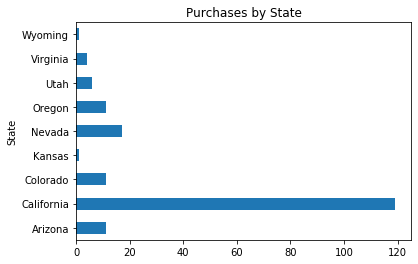

In [80]:
#visualize bar chart
sales_df.groupby('State')['State'].count().plot(kind='barh',title='Purchases by State')